# Continuing Analysis

In this file we will be continuing our analysis of the housing dataset. In order to improve the model there will be a few additional changes to the EDA process, as well as an analysis of the features to move down the number of features involved. Finally, there will be a different model trained, with different combinations of activations functions to try and lower our RMSE.

In [ ]:
# Import the nessesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.api._v2.keras import activations

print(tf.__version__)

2.12.0


In [ ]:
!wget https://raw.githubusercontent.com/hixtape1212/Group1Capstone/Gerardo/Austin_notebooks/austinHousingData.csv

--2023-07-26 22:35:39--  https://raw.githubusercontent.com/hixtape1212/Group1Capstone/Gerardo/Austin_notebooks/austinHousingData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11389525 (11M) [text/plain]
Saving to: ‘austinHousingData.csv’

austinHousingData.c 100%[===================>]  10.86M  --.-KB/s    in 0.07s   

2023-07-26 22:35:39 (149 MB/s) - ‘austinHousingData.csv’ saved [11389525/11389525]



In [ ]:
file_path = 'austinHousingData.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [ ]:
#Let's look at the home types. We primarily only want single family homes
df.homeType.value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [ ]:
df = df[df.homeType == 'Single Family']
df.shape

(14241, 47)

In [ ]:
#Drop object columns as well as zipid
col_drop_list = df.select_dtypes(include=[np.object]).keys()
col_drop_list = col_drop_list.union(['zpid'])
df = df.drop(col_drop_list, axis=1)
df.shape

<ipython-input-7-421071a199b5>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_drop_list = df.select_dtypes(include=[np.object]).keys()


(14241, 39)

In [ ]:
#Changing Booleans to int values
col_bool_list = ['hasAssociation', 'hasCooling',
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df = df.drop(col_bool_list, axis=1)
df.shape

(14241, 39)

In [ ]:
#Now we should have a dataset that is all Single Family homes w/ integer values
#Lets look at the home prices we are predicting
df.describe().transpose().apply(lambda x: x.apply('{0:f}'.format))

,count,mean,std,min,25%,50%,75%,max
zipcode,14241.000000,78736.186785,18.721340,78617.000000,78727.000000,78739.000000,78749.000000,78759.000000
latitude,14241.000000,30.291740,0.098383,30.085030,30.201195,30.284163,30.367920,30.517174
longitude,14241.000000,-97.780411,0.085880,-98.022057,-97.841804,-97.771988,-97.718689,-97.569504
propertyTaxRate,14241.000000,1.994731,0.054207,1.980000,1.980000,1.980000,1.980000,2.210000
garageSpaces,14241.000000,1.236851,1.343474,0.000000,0.000000,1.000000,2.000000,20.000000
parkingSpaces,14241.000000,1.236219,1.343612,0.000000,0.000000,1.000000,2.000000,20.000000
yearBuilt,14241.000000,1988.408749,21.555337,1905.000000,1974.000000,1993.000000,2006.000000,2020.000000
latestPrice,14241.000000,516387.884629,446969.176124,5500.000000,310000.000000,409900.000000,575000.000000,13500000.000000
numPriceChanges,14241.000000,3.044730,2.491960,1.000000,1.000000,2.000000,4.000000,23.000000
latest_salemonth,14241.000000,6.728039,3.134325,1.000000,4.000000,7.000000,9.000000,12.000000


In [ ]:
#From the previous view the price ranges wildly between 5500 and 13Milion
#Narrowing this down can help our model. Lets look at the mid 80 & 90%
upper = np.percentile(df.latestPrice, 90)
lower = np.percentile(df.latestPrice, 10)

print('Middle 90 are values between {} and {}'.format(lower, upper))

Middle 90 are values between 240000.0 and 840000.0


In [ ]:
upper = np.percentile(df.latestPrice, 95)
lower = np.percentile(df.latestPrice, 5)

print('Middle 95 are values between {} and {}'.format(lower, upper))

Middle 95 are values between 207000.0 and 1175000.0


The middle 95% of the home values are between 207,000 and 1,175,000. If we move the lower bound down I think we should be looking at home from 200,000 to 1.1 million, covering roughly 95% of our data

In [ ]:
df = df.drop(df[df['latestPrice'] < 200000].index)
df = df.drop(df[df['latestPrice'] > 1175000].index)
df.shape

(12907, 39)

Now the data should be at the point where we want it. Let's try to run a new model and see where it get's us. I think running something similar to the last one should work fine.

In [ ]:
#Creating trianing and testing as well as Normalizing
#Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop('latestPrice', axis='columns')
y = df.latestPrice
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=42)

#Normalize the feature data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X_norm_train = sc.fit_transform(X_train)
X_norm_test = sc.fit_transform(X_test)

In [ ]:
#Creating the model
def build_model():
  model = keras.Sequential([
      layers.Dense(80, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
      layers.Dense(40, activation=tf.nn.leaky_relu),
      layers.Dense(20, activation=tf.nn.leaky_relu),
      layers.Dense(10, activation=tf.nn.leaky_relu),
      layers.Dense(1)
  ])

  optimizer = 'adam'

  model.compile(
      loss = 'mse',
      optimizer=optimizer,
      metrics=['mae','mse']
  )

  return model

In [ ]:
#Instantiate the model and create early stopping
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3120      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,401
Trainable params: 7,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Test the model
ex = model.predict(X_norm_train[:10])
ex

1/1 [==============================] - 1s 752ms/step


array([[0.08790653],
       [0.3344239 ],
       [0.23260236],
       [0.15383993],
       [0.11686304],
       [0.14471601],
       [0.2058359 ],
       [0.18834616],
       [0.14997743],
       [0.39742842]], dtype=float32)

In [ ]:
#Build the model
history = model.fit(X_norm_train, y_train,
                    batch_size=40,
                    epochs=100,
                    validation_split=.2,
                    verbose=0,
                    callbacks=[early_stop])

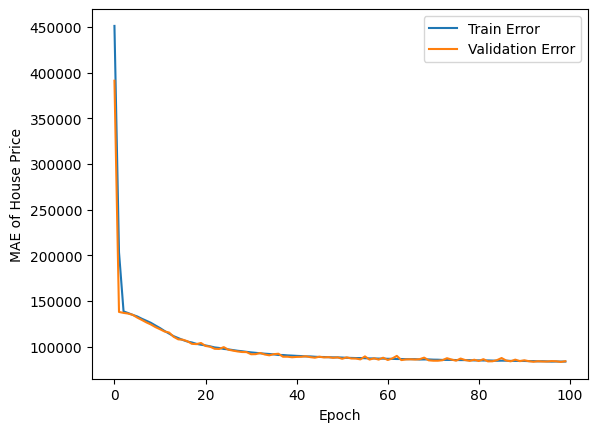

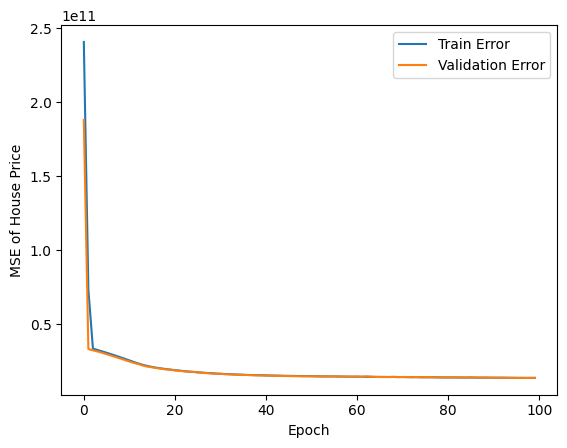

In [ ]:
#Creating plotting functions
def plot_results(r):
  hist = pd.DataFrame(r.history)
  hist['epoch'] = r.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MAE of House Price')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label='Validation Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('MSE of House Price')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label='Validation Error')
  plt.legend()


plot_results(history)

In [ ]:
#Overall looks pretty good, let's see what kind of RMSE and MAE we're getting
loss, mae, mse = model.evaluate(X_norm_test, y_test, verbose=0)

print('Testing set Mean Abs Error: {:5.2f} dollars'.format(mae))
print('Testing set Root Mean Squared Error: {:5.2f} dollars'.format(np.sqrt(mse)))

Testing set Mean Abs Error: 178868.50 dollars
Testing set Root Mean Squared Error: 243003.18 dollars


In [ ]:
#Creating the model with dropout layers for overfitting
from keras.layers import Dropout

def build_model():
  model = keras.Sequential([

      layers.Dense(80, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
      layers.Dropout(.2),

      layers.Dense(40, activation=tf.nn.leaky_relu),
      layers.Dropout(.2),

      layers.Dense(20, activation=tf.nn.leaky_relu),
      layers.Dropout(.2),

      layers.Dense(1)
  ])

  optimizer = 'adam'

  model.compile(
      loss = 'mse',
      optimizer=optimizer,
      metrics=['mae','mse']
  )

  return model

In [ ]:
v2_model = build_model()
v2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 80)                3120      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 40)                3240      
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

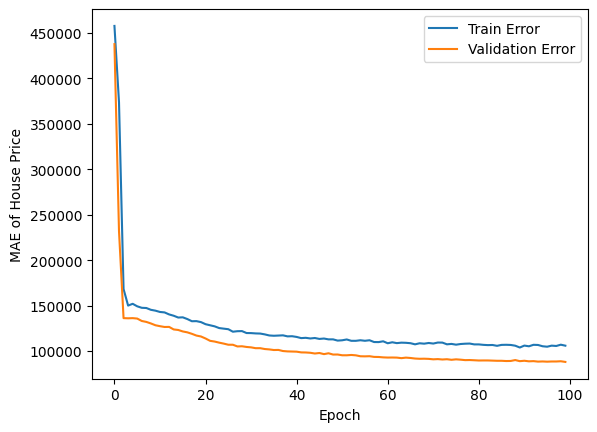

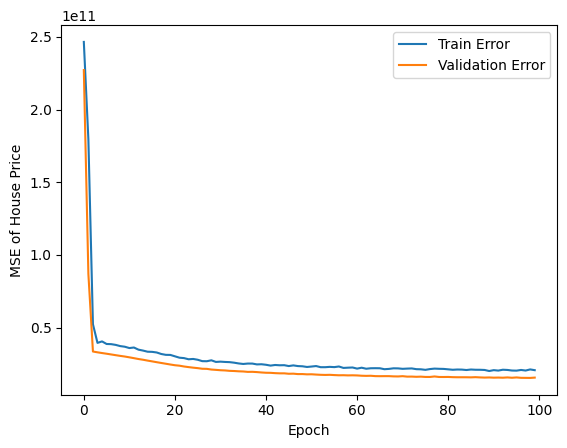

In [ ]:
v2_history = v2_model.fit(X_norm_train, y_train,
                          batch_size=40,
                          epochs=100,
                          validation_split=.2,
                          verbose=0,
                          callbacks=[early_stop])
plot_results(v2_history)

In [ ]:
v2_loss, v2_mae, v2_mse = v2_model.evaluate(X_norm_test, y_test, verbose=0)

print('Testing set Mean Abs Error: {:5.2f} dollars'.format(v2_mae))
print('Testing set Root Mean Squared Error: {:5.2f} dollars'.format(np.sqrt(v2_mse)))

Testing set Mean Abs Error: 203237.16 dollars
Testing set Root Mean Squared Error: 258155.96 dollars


## Focus on trying to get a low MSE
Now we're going to focus on trying to get the model more accurate, without caring about overfitting. In this run we'll try to not use any dropouts or early stopping to incentise the model to get the best score it possibly can.

In [ ]:
#No dropout
def build_model():
  model = keras.Sequential([

      layers.Dense(39, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),

      layers.Dense(39, activation=tf.nn.leaky_relu),

      layers.Dense(20, activation=tf.nn.leaky_relu),

      layers.Dense(1, activation=tf.nn.relu)
  ])

  optimizer = 'adam'

  model.compile(
      loss = 'mse',
      optimizer=optimizer,
      metrics=['mae','mse']
  )

  return model

In [ ]:
v3_model = build_model()
v3_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 39)                1521      
                                                                 
 dense_10 (Dense)            (None, 39)                1560      
                                                                 
 dense_11 (Dense)            (None, 20)                800       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 3,902
Trainable params: 3,902
Non-trainable params: 0
_________________________________________________________________


Testing set Mean Abs Error: 203769.31 dollars
Testing set Root Mean Squared Error: 259471.27 dollars


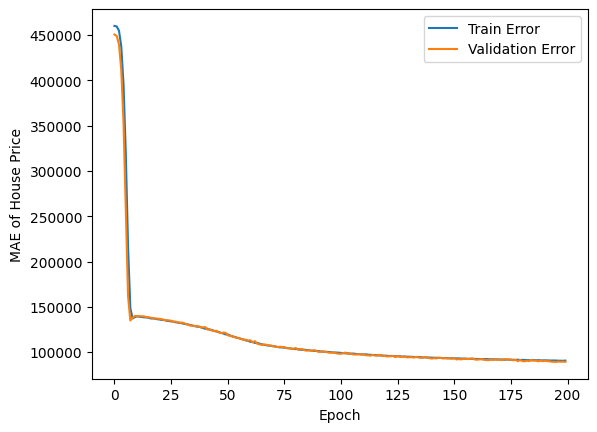

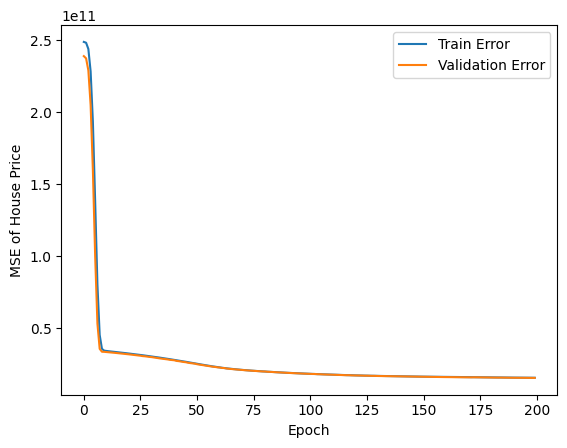

In [ ]:
v3_history = v3_model.fit(X_norm_train, y_train,
                          batch_size=100,
                          epochs=200,
                          validation_split=.2,
                          verbose=0)
plot_results(v3_history)

v3_loss, v3_mae, v3_mse = v3_model.evaluate(X_norm_test, y_test, verbose=0)

print('Testing set Mean Abs Error: {:5.2f} dollars'.format(v3_mae))
print('Testing set Root Mean Squared Error: {:5.2f} dollars'.format(np.sqrt(v3_mse)))

In [ ]:
#No dropout, normal dense ending layer
def build_model():
  model = keras.Sequential([

      layers.Dense(39, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),

      layers.Dense(39, activation=tf.nn.leaky_relu),

      layers.Dense(20, activation=tf.nn.leaky_relu),

      layers.Dense(1)
  ])

  optimizer = 'adam'

  model.compile(
      loss = 'mse',
      optimizer=optimizer,
      metrics=['mae','mse']
  )

  return model

In [ ]:
v4_model = build_model()
v4_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 39)                1521      
                                                                 
 dense_14 (Dense)            (None, 39)                1560      
                                                                 
 dense_15 (Dense)            (None, 20)                800       
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 3,902
Trainable params: 3,902
Non-trainable params: 0
_________________________________________________________________


Testing set Mean Abs Error: 186854.22 dollars
Testing set Root Mean Squared Error: 250361.28 dollars


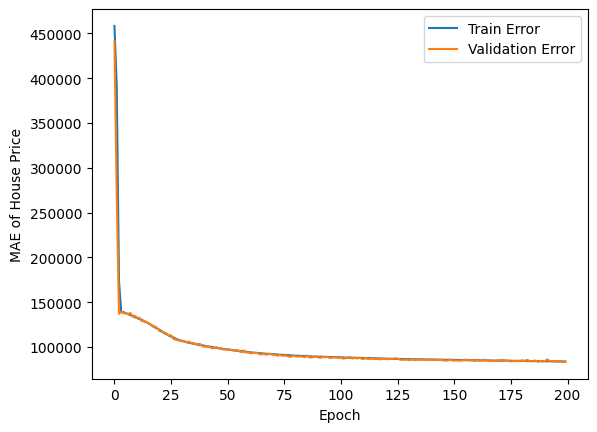

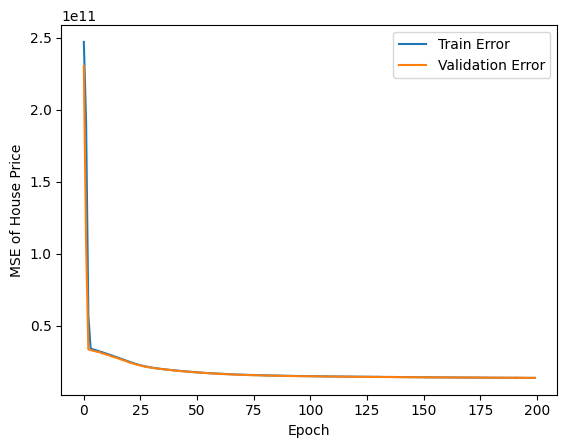

In [ ]:
v4_history = v4_model.fit(X_norm_train, y_train,
                          epochs=200,
                          validation_split=.2,
                          verbose=0)
plot_results(v4_history)

v4_loss, v4_mae, v4_mse = v4_model.evaluate(X_norm_test, y_test, verbose=0)

print('Testing set Mean Abs Error: {:5.2f} dollars'.format(v4_mae))
print('Testing set Root Mean Squared Error: {:5.2f} dollars'.format(np.sqrt(v4_mse)))

In [ ]:
#No dropout, normal dense ending layer, only relu since no negative
#Additional nodes and layers to attempt to overfit
def build_model():
  model = keras.Sequential([

      layers.Dense(39, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),

      layers.Dense(78, activation=tf.nn.relu),

      layers.Dense(78, activation=tf.nn.relu),

      layers.Dense(39, activation=tf.nn.relu),

      layers.Dense(19, activation=tf.nn.relu),

      layers.Dense(1)
  ])

  optimizer = 'adam'

  model.compile(
      loss = 'mse',
      optimizer=optimizer,
      metrics=['mae','mse']
  )

  return model

In [ ]:
v5_model = build_model()
v5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 39)                1521      
                                                                 
 dense_18 (Dense)            (None, 78)                3120      
                                                                 
 dense_19 (Dense)            (None, 78)                6162      
                                                                 
 dense_20 (Dense)            (None, 39)                3081      
                                                                 
 dense_21 (Dense)            (None, 19)                760       
                                                                 
 dense_22 (Dense)            (None, 1)                 20        
                                                                 
Total params: 14,664
Trainable params: 14,664
Non-trai

Epoch 1/300
259/259 [==============================] - 2s 3ms/step - loss: 161501118464.0000 - mae: 333582.7188 - mse: 161501118464.0000 - val_loss: 33317859328.0000 - val_mae: 138285.7812 - val_mse: 33317859328.0000
Epoch 2/300
259/259 [==============================] - 1s 3ms/step - loss: 33172236288.0000 - mae: 137761.2656 - mse: 33172236288.0000 - val_loss: 32012605440.0000 - val_mae: 139710.7969 - val_mse: 32012605440.0000
Epoch 3/300
259/259 [==============================] - 1s 2ms/step - loss: 31196938240.0000 - mae: 133970.6094 - mse: 31196938240.0000 - val_loss: 29444812800.0000 - val_mae: 128805.1250 - val_mse: 29444812800.0000
Epoch 4/300
259/259 [==============================] - 1s 2ms/step - loss: 28792119296.0000 - mae: 128155.5781 - mse: 28792119296.0000 - val_loss: 27020208128.0000 - val_mae: 124519.8203 - val_mse: 27020208128.0000
Epoch 5/300
259/259 [==============================] - 1s 3ms/step - loss: 26017144832.0000 - mae: 121503.6953 - mse: 26017144832.0000 - v

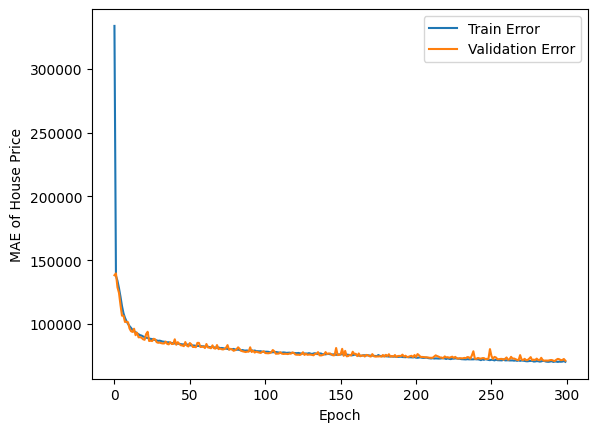

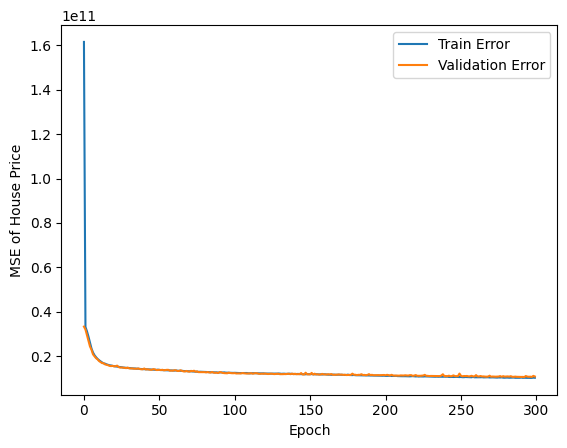

In [ ]:
v5_history = v5_model.fit(X_norm_train, y_train,
                          epochs=300,
                          validation_split=.2,
                          verbose=1)
plot_results(v5_history)

v5_loss, v5_mae, v5_mse = v5_model.evaluate(X_norm_test, y_test, verbose=0)

print('Testing set Mean Abs Error: {:5.2f} dollars'.format(v5_mae))
print('Testing set Root Mean Squared Error: {:5.2f} dollars'.format(np.sqrt(v5_mse)))